<a href="https://www.kaggle.com/code/enricofindley/ultimate-music-analytics-challenge?scriptVersionId=142294809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The Ultimate Music Analytics Challenge

Welcome to the Ultimate Music Analytics Challenge! In this notebook, we will embark on a journey to explore the fascinating world of music using a rich dataset containing a wide range of attributes for songs. Let's dive in and discover some interesting insights about the music industry.

## Table of Contents
1. [Introduction](#introduction)
2. [Data Exploration](#data-exploration)
3. [Data Visualization](#data-visualization)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Predictive Modeling](#predictive-modeling)
6. [Conclusion](#conclusion)

## Introduction <a id="introduction"></a>

Music is a universal language, and it evolves over time. With this dataset, we have the opportunity to analyze various aspects of songs, from their attributes like tempo and energy to their popularity on streaming platforms.

Let's start by loading the data and getting an overview of what's inside.


In [1]:
# Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Import necessary machine learning libraries and split the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
# Load the dataset
data = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding = "ISO-8859-1")
# Filter the rows where 'track_title' is not equal to "Love Grows (Where My Rosemary Goes)"
data = data[data['track_name'] != "Love Grows (Where My Rosemary Goes)"]

# Reset the index after removing rows
data.reset_index(drop=True, inplace=True)

## Data Exploration <a id="data-exploration"></a>

Before we dive into the analysis, it's crucial to understand our data. Let's take a quick look at the first few rows and check for missing values.

In [2]:
# Display the first few rows of the dataset
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Check for missing values
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

## Data Visualization <a id="data-visualization"></a>
They say a picture is worth a thousand words. Let's create some visually appealing plots to better understand our dataset.

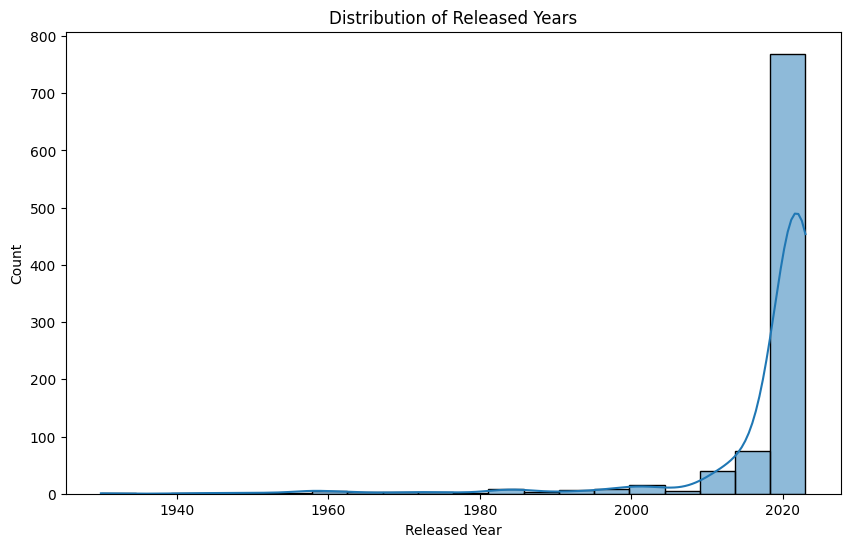

In [4]:
# Create a histogram of released years

plt.figure(figsize=(10, 6))
sns.histplot(data['released_year'], bins=20, kde=True)
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.title('Distribution of Released Years')
plt.show()

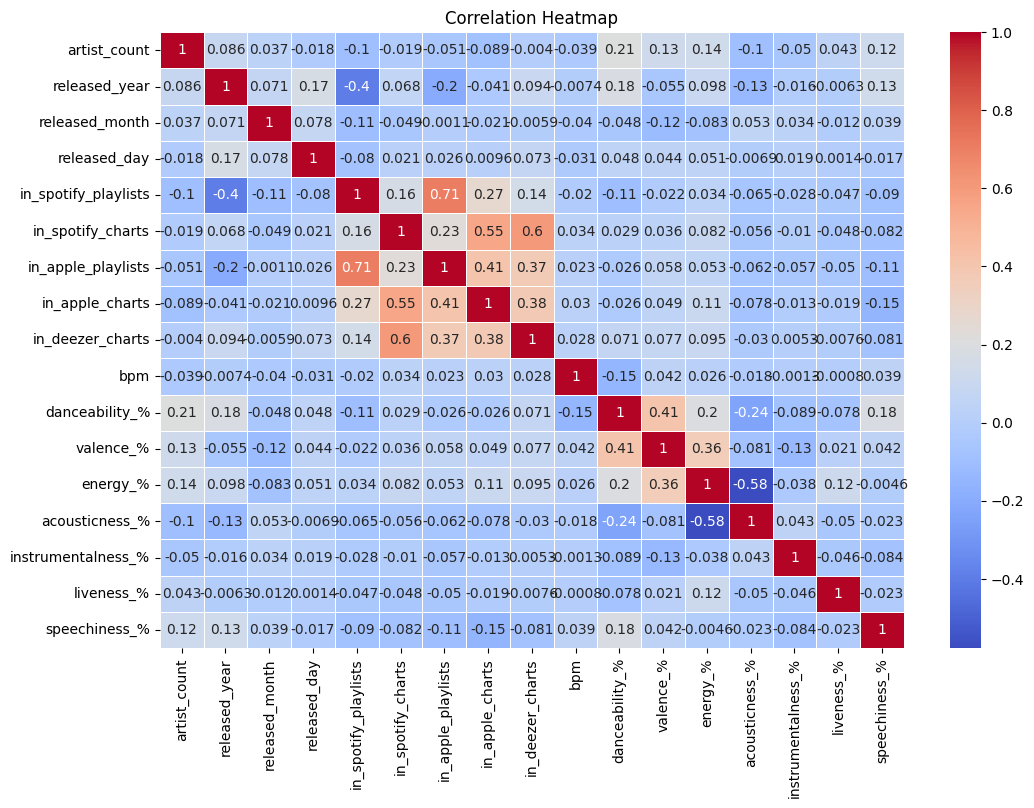

In [5]:
# Exclude non-numeric columns (e.g., song names) from the correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric data
corr_matrix = numeric_data.corr()

# Now you can create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Exploratory Data Analysis <a id="exploratory-data-analysis"></a>
Now, let's dig deeper into the data and uncover interesting patterns.

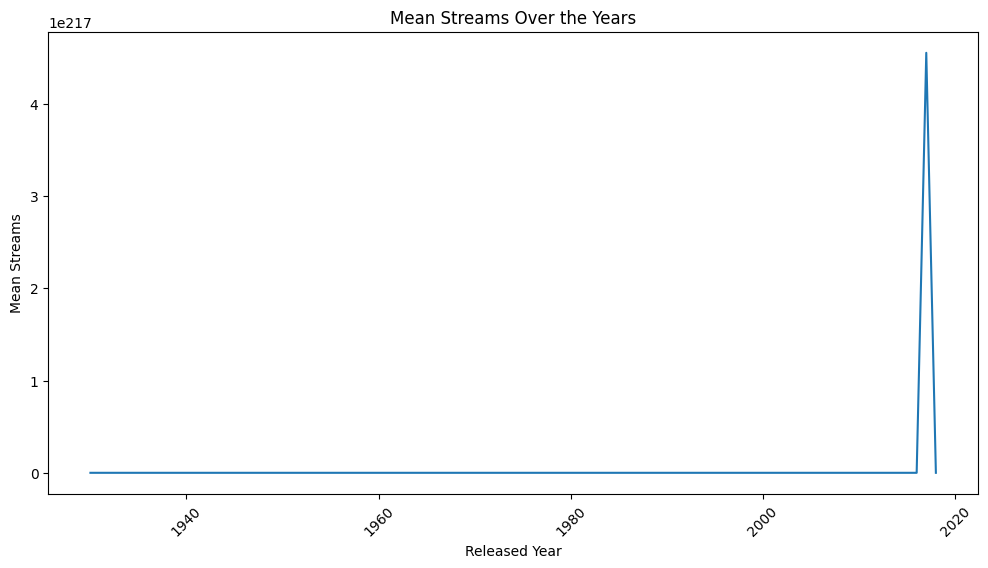

In [6]:
# Convert 'released_year' column to numeric (assuming it's originally in a string format)
data['released_year'] = data['released_year'].astype(int)

# Group data by released year and calculate the mean stream count
yearly_streams = data.groupby('released_year')['streams'].mean().reset_index()

# Plot the mean stream count over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_streams, x='released_year', y='streams')
plt.xlabel('Released Year')
plt.ylabel('Mean Streams')
plt.title('Mean Streams Over the Years')
plt.xticks(rotation=45)
plt.show()

## Predictive Modeling <a id="predictive-modeling"></a>
Can we predict song popularity based on certain attributes? Let's build a simple predictive model.

In [7]:
# Define the number of folds (k)
k = 5  # You can adjust this value as needed

# Define your model
model = LinearRegression()

# Define the input features (X) and target variable (y)
X = data[['valence_%', 'energy_%']]
y = data['streams']

# Create a KFold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and calculate RMSE for each fold
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))

# Print the RMSE for each fold
for i, rmse in enumerate(rmse_scores):
    print(f'Fold {i+1} RMSE: {rmse}')

# Calculate and print the mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)
print(f'Mean RMSE: {mean_rmse}')

Fold 1 RMSE: 496697156.02382857
Fold 2 RMSE: 634488856.56462
Fold 3 RMSE: 534165914.1133219
Fold 4 RMSE: 609053517.8683727
Fold 5 RMSE: 556212167.0519145
Mean RMSE: 566123522.3244114


## Conclusion <a id="conclusion"></a>
Our journey through the world of music analytics has been enlightening. We've explored the data, visualized key trends, and even attempted to predict song popularity. The possibilities with this dataset are endless, and we've only scratched the surface.